# *Installing Libraries*

In [1]:
import torch

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda")

In [2]:
# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [3]:
! pip install -q transformers

<IPython.core.display.Javascript object>

In [4]:
! pip install -q datasets

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.4 MB/s eta 0:00:00


In [5]:
! pip install -q transformers[torch]

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.5 MB/s eta 0:00:00


In [6]:
! pip install transformers gradio -q

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.6 MB/

In [7]:
pip install -q gradio --upgrade

<IPython.core.display.Javascript object>

In [8]:
! pip install -q accelerate>=0.20.3 -U

<IPython.core.display.Javascript object>

In [9]:
! pip install -q sacrebleu

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 1.1 MB/s eta 0:00:00


## Reading convos.json.....And tokenization

convos.json contains information for interactive purposes, a realisitc way of conversing with the user

In [ ]:
import json

# Replace 'your_dataset.json' with the actual path to your JSON file
with open('convos.json', 'r') as file:
    dataset = json.load(file)


<IPython.core.display.Javascript object>

FileNotFoundError: ignored

In [ ]:
training_set = []

for conversation_id, conversation_data in dataset.items():
    for i in range(len(conversation_data)):
        if i < len(conversation_data) - 1:
            user_message = conversation_data[i]['text']
            therapist_message = conversation_data[i + 1]['text']

            training_set.append((user_message, therapist_message))


In [ ]:
from transformers import AutoTokenizer

# Replace 'your_model_name' with the actual name of the pre-trained model you want to use
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

# Tokenize and convert to data tensors
tokenized_data = tokenizer(training_set, padding=True, truncation=True, return_tensors='tf')


In [ ]:
print(tokenized_data)

# Intent Classification Model
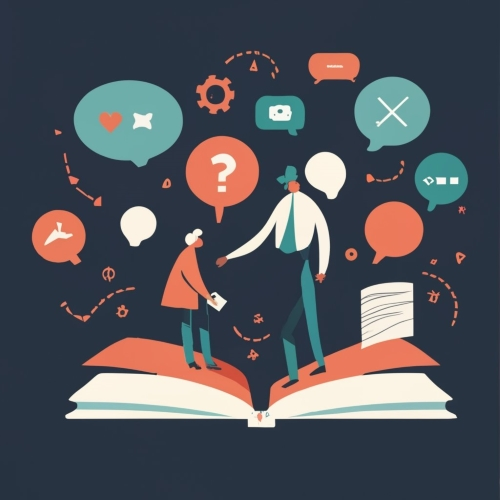

# Reading intents.json.....And tokenization

intents.json is a pivotal dataset for training a chatbot, as it contains predefined user intents and corresponding patterns, facilitating the chatbot's ability to comprehend user queries and provide relevant responses.

In [ ]:
import json

# Replace 'intents.json' with the actual path to your intents JSON file
with open('intents.json', 'r') as file:
    intents_data = json.load(file)


<IPython.core.display.Javascript object>

In [ ]:
training_set = []

for intent in intents_data['intents']:
    tag = intent['tag']
    patterns = intent['patterns']

    for pattern in patterns:
        training_set.append((pattern, tag))


<IPython.core.display.Javascript object>

In [ ]:
from transformers import AutoTokenizer

# Replace 'your_model_name' with the actual name of the pre-trained model you want to use
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

# Extract patterns and tags from training set
patterns, tags = zip(*training_set)

# Tokenize patterns and convert to data tensors
tokenized_patterns = tokenizer(patterns, padding=True, truncation=True, return_tensors='tf')

# Convert intent tags to numerical labels (you can use LabelEncoder)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_tags = label_encoder.fit_transform(tags)


<IPython.core.display.Javascript object>

In [ ]:
tokenized_patterns

<IPython.core.display.Javascript object>

{'input_ids': <tf.Tensor: shape=(337, 183), dtype=int32, numpy=
array([[  101,  8790,   102, ...,     0,     0,     0],
       [  101,  4403,   102, ...,     0,     0,     0],
       [  101,  2181,  2256, ...,     0,     0,     0],
       ...,
       [  101,  1789,  4457, ...,     0,     0,     0],
       [  101,  1422,  2153, ...,     0,     0,     0],
       [  101, 22049,  8858, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(337, 183), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(337, 183), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32

#**Fine Tuning Yanjie's DistillBert model for intent classification on intents_train.json**:

In [ ]:
import torch

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda")

<IPython.core.display.Javascript object>

In [ ]:
from ast import arg
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("Yanjie/message-intent")
model = AutoModelForSequenceClassification.from_pretrained("Yanjie/message-intent").to(device)




<IPython.core.display.Javascript object>

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import torch
from transformers import Trainer, TrainingArguments
from datasets import load_dataset, load_metric

# Load your dataset
# Replace 'your_dataset_path' with the path to your dataset file or use a custom dataset loader.
# Make sure your dataset contains 'text' (user messages) and 'label' (intent labels) columns.
dataset = load_dataset("json", data_files='intents_train.json')




<IPython.core.display.Javascript object>

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import pandas as pd

# Convert your dataset to a Pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Assuming 'label' is the column you want to find unique values for
unique_labels = df['label'].unique()
print(unique_labels)


<IPython.core.display.Javascript object>

['saying hello' 'seeking advice' 'expressing gratitude' 'sharing emotions'
 'asking questions' 'making statements' 'saying goodbye' 'others']


In [ ]:
label_map = {}
for i, label in enumerate(unique_labels):
    label_map[label] = i

<IPython.core.display.Javascript object>

In [ ]:
label_map

<IPython.core.display.Javascript object>

{'saying hello': 0,
 'seeking advice': 1,
 'expressing gratitude': 2,
 'sharing emotions': 3,
 'asking questions': 4,
 'making statements': 5,
 'saying goodbye': 6,
 'others': 7}

In [ ]:
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)



<IPython.core.display.Javascript object>

In [ ]:
# # Convert string labels to integer labels in the dataset
def convert_labels(example):
    example["label"] = label_map[example["label"]]
    return example

# Function to convert string labels to integer labels
# def convert_labels_to_int(labels, label_map):
#     int_labels = [key for key, value in label_map.items() if value in labels]
#     return int_labels

<IPython.core.display.Javascript object>

In [ ]:
tokenized_datasets = dataset['train'].map(tokenize_function, batched=True)

<IPython.core.display.Javascript object>

Map:   0%|          | 0/492 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

<IPython.core.display.Javascript object>

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 492
})

In [ ]:
tokenized_datasets = tokenized_datasets.map(convert_labels)

<IPython.core.display.Javascript object>

Map:   0%|          | 0/492 [00:00<?, ? examples/s]

In [ ]:
# Split the tokenized dataset into training and validation sets (80% train, 20% validation)
split_dataset = tokenized_datasets.train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset['train']
validation_dataset = split_dataset['test']

<IPython.core.display.Javascript object>

In [ ]:
# Define training arguments
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    per_device_train_batch_size=32,
    output_dir='./results',  # Directory where checkpoints and logs will be saved
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,  # Number of steps before evaluating on the validation set
    save_steps=100,  # Number of steps before saving a checkpoint
    load_best_model_at_end=True,
    push_to_hub=False,  # Set to True if you want to push the model to the Hugging Face Model Hub
)



<IPython.core.display.Javascript object>

In [ ]:
# Define a metric for evaluation (e.g., accuracy)
metric = load_metric("accuracy")

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    data_collator=None,  # You can use your own data collator if needed
    compute_metrics=metric.compute
)


<IPython.core.display.Javascript object>

<ipython-input-20-9cff95e6a1db>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
# Fine-tune the model on your dataset
trainer.train()


<IPython.core.display.Javascript object>

Step,Training Loss,Validation Loss


TrainOutput(global_step=39, training_loss=1.1439392872345753, metrics={'train_runtime': 50.4148, 'train_samples_per_second': 23.386, 'train_steps_per_second': 0.774, 'total_flos': 156270975667200.0, 'train_loss': 1.1439392872345753, 'epoch': 3.0})

In [ ]:
# Save the fine-tuned model
trainer.save_model('./fine_tuned_intent_model')

<IPython.core.display.Javascript object>

# Testing the fine tuned model

In [ ]:
import torch

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




In [ ]:
unique_labels

<IPython.core.display.Javascript object>

array(['saying hello', 'seeking advice', 'expressing gratitude',
       'sharing emotions', 'asking questions', 'making statements',
       'saying goodbye', 'others'], dtype=object)

# Single intent clasification

From Yanjie's pretrained

*   tokenizer - AutoTokenizer
*   model - AutoModelForSequenceClassification



In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

def intent_classification(user_message, model_path="/content/fine_tuned_intent_model", intent_labels=None):
    """
    Perform intent classification on a user's message.

    Args:
        user_message (str): The user's input message for intent classification.
        model_path (str): The path to the fine-tuned intent classification model.
        intent_labels (list): Optional list of intent labels for mapping predicted labels.

    Returns:
        str: The predicted intent label.
    """
    # Load the fine-tuned model
    tokenizer = AutoTokenizer.from_pretrained("Yanjie/message-intent")
    model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)             #new line

    # Tokenize the user message
    inputs = tokenizer(user_message, return_tensors="pt").to(device)             #new line

    # Perform intent classification
    with torch.no_grad():
        logits = model(**inputs.to(device)).logits                        #new line

    # Get the predicted intent label
    predicted_intent_label = torch.argmax(logits, dim=1).item()

    # Map to the original intent label if provided
    if intent_labels:
        predicted_intent = intent_labels[predicted_intent_label]
    else:
        predicted_intent = str(predicted_intent_label)

    return predicted_intent




<IPython.core.display.Javascript object>

In [ ]:
label_map

<IPython.core.display.Javascript object>

{'saying hello': 0,
 'seeking advice': 1,
 'expressing gratitude': 2,
 'sharing emotions': 3,
 'asking questions': 4,
 'making statements': 5,
 'saying goodbye': 6,
 'others': 7}

In [ ]:
# Example usage:
user_message = "I've been feeling really stressed out lately, and I'm not sure how to cope with it."
predicted_intent = intent_classification(user_message)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: 3


In [ ]:
user_message = "My hat is made of excellent fabric, it's made in India."
predicted_intent = intent_classification(user_message)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: 5


In [ ]:
user_message = "let's sing song babyyyy!!!"
predicted_intent = intent_classification(user_message)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: 7


In [ ]:
label_map_2 = {}
for i, label in enumerate(unique_labels):
    label_map_2[i] = label

<IPython.core.display.Javascript object>

In [ ]:
user_message = "My first love has returned, I'll bag her this"
# predicted_intent = intent_classification(user_message)
# print("Predicted Intent:", unique_labels[int(predicted_intent)])


intent_pred = unique_labels[int(intent_classification(user_message))]
intent_pred

<IPython.core.display.Javascript object>

'making statements'

# Multi intent classification

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

def multi_intent_classification(user_message, model_path="/content/fine_tuned_intent_model", intent_labels=None, threshold=0.5):
    """
    Perform multi-intent classification on a user's message.

    Args:
        user_message (str): The user's input message for multi-intent classification.
        model_path (str): The path to the fine-tuned multi-intent classification model.
        intent_labels (list): Optional list of intent labels for mapping predicted labels.
        threshold (float): Threshold for considering an intent label as present (default is 0.5).

    Returns:
        list: List of predicted intent labels with probabilities.
    """
    # Load the fine-tuned model
    tokenizer = AutoTokenizer.from_pretrained("Yanjie/message-intent")
    model = AutoModelForSequenceClassification.from_pretrained(model_path)

    # Tokenize the user message
    inputs = tokenizer(user_message, return_tensors="pt")

    # Perform multi-intent classification
    with torch.no_grad():
        logits = model(**inputs).logits

    # Apply sigmoid activation function to get probabilities
    probabilities = torch.sigmoid(logits)

    # Get intent labels with probabilities exceeding the threshold
    predicted_intents = []
    for i, prob in enumerate(probabilities[0]):
        if prob > threshold:
            if intent_labels:
                predicted_intent = intent_labels[i]
            else:
                predicted_intent = f"intent_{i}"  # Create a label if no intent_labels provided
            predicted_intents.append({"intent": predicted_intent, "probability": prob.item()})

    # Sort predicted intents by probability (highest first)
    predicted_intents = sorted(predicted_intents, key=lambda x: x["probability"], reverse=True)

    return predicted_intents


<IPython.core.display.Javascript object>

In [ ]:
# Example usage:
user_message = "thank you for your assitance and guidance, I'll make sure I come to these sessions regularly, okay thanks good bye."
predicted_intent = multi_intent_classification(user_message)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_0', 'probability': 0.9838922023773193}, {'intent': 'intent_2', 'probability': 0.9614038467407227}, {'intent': 'intent_5', 'probability': 0.9609094858169556}, {'intent': 'intent_3', 'probability': 0.9436165690422058}, {'intent': 'intent_10', 'probability': 0.7470287084579468}, {'intent': 'intent_6', 'probability': 0.714017391204834}, {'intent': 'intent_7', 'probability': 0.6739623546600342}, {'intent': 'intent_4', 'probability': 0.611701250076294}]


# **MODEL - XLMRobertaForSequenceClassification**
tokenizer - AutoTokenizer

In [ ]:
import torch

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda")

<IPython.core.display.Javascript object>

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, XLMRobertaForSequenceClassification
# cartesinus/xlm-r-base-amazon-massive-intent-label_smoothing
# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("cartesinus/xlm-r-base-amazon-massive-intent-label_smoothing")
model = AutoModelForSequenceClassification.from_pretrained("cartesinus/xlm-r-base-amazon-massive-intent-label_smoothing").to(device)


<IPython.core.display.Javascript object>

In [ ]:
import torch
from transformers import Trainer, TrainingArguments
from datasets import load_dataset, load_metric

# Load your dataset
# Replace 'your_dataset_path' with the path to your dataset file or use a custom dataset loader.
# Make sure your dataset contains 'text' (user messages) and 'label' (intent labels) columns.
dataset = load_dataset("json", data_files='intents_train.json')

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Convert your dataset to a Pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Assuming 'label' is the column you want to find unique values for
unique_labels = df['label'].unique()
print(unique_labels)


<IPython.core.display.Javascript object>

['saying hello' 'seeking advice' 'expressing gratitude' 'sharing emotions'
 'asking questions' 'making statements' 'saying goodbye' 'others']


In [ ]:
label_map = {}
for i, label in enumerate(unique_labels):
    label_map[label] = i

<IPython.core.display.Javascript object>

In [ ]:
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)



<IPython.core.display.Javascript object>

In [ ]:
# Convert string labels to integer labels in the dataset
def convert_labels(example):
    example["label"] = label_map[example["label"]]
    return example

<IPython.core.display.Javascript object>

In [ ]:
tokenized_datasets = dataset['train'].map(tokenize_function, batched=True)

<IPython.core.display.Javascript object>

In [ ]:
tokenized_datasets = tokenized_datasets.map(convert_labels)

<IPython.core.display.Javascript object>

In [ ]:
# Split the tokenized dataset into training and validation sets (80% train, 20% validation)
split_dataset = tokenized_datasets.train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset['train']
validation_dataset = split_dataset['test']

<IPython.core.display.Javascript object>

In [ ]:
# Define training arguments
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    per_device_train_batch_size=4,
    output_dir='./results',  # Directory where checkpoints and logs will be saved
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,  # Number of steps before evaluating on the validation set
    save_steps=100,  # Number of steps before saving a checkpoint
    load_best_model_at_end=True,
    push_to_hub=False,  # Set to True if you want to push the model to the Hugging Face Model Hub
)



<IPython.core.display.Javascript object>

In [ ]:
from transformers import EvalPrediction

def custom_accuracy(p: EvalPrediction):
    # Extract predictions and label_ids
    predictions = p.predictions.argmax(axis=1)
    label_ids = p.label_ids

    # Calculate accuracy
    correct = (predictions == label_ids).sum()
    total = len(predictions)
    accuracy = correct / total

    # Return accuracy as a dictionary
    return {"accuracy": accuracy}




# Define a metric for evaluation (e.g., accuracy)
metric = load_metric("accuracy")

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    data_collator=None,  # You can use your own data collator if needed
    compute_metrics=custom_accuracy
)


<IPython.core.display.Javascript object>

In [ ]:
# Fine-tune the model on your dataset
trainer.train()

<IPython.core.display.Javascript object>

Step,Training Loss,Validation Loss,Accuracy
100,No log,0.696887,0.797980
200,No log,0.492735,0.848485


TrainOutput(global_step=297, training_loss=0.798549356685343, metrics={'train_runtime': 187.7782, 'train_samples_per_second': 6.279, 'train_steps_per_second': 1.582, 'total_flos': 310369477718016.0, 'train_loss': 0.798549356685343, 'epoch': 3.0})

In [ ]:
# Save the fine-tuned model
trainer.save_model('./fine_tuned_intent_model_xlm')

<IPython.core.display.Javascript object>

###SINGLE-INTENT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

def intent_classification(user_message, model_path="/content/fine_tuned_intent_model_xlm", intent_labels=None):
    """
    Perform intent classification on a user's message.

    Args:
        user_message (str): The user's input message for intent classification.
        model_path (str): The path to the fine-tuned intent classification model.
        intent_labels (list): Optional list of intent labels for mapping predicted labels.

    Returns:
        str: The predicted intent label.
    """
    # Load the fine-tuned model
    tokenizer = AutoTokenizer.from_pretrained("Yanjie/message-intent")
    model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)             #new line

    # Tokenize the user message
    inputs = tokenizer(user_message, return_tensors="pt").to(device)             #new line

    # Perform intent classification
    with torch.no_grad():
        logits = model(**inputs.to(device)).logits                        #new line

    # Get the predicted intent label
    predicted_intent_label = torch.argmax(logits, dim=1).item()

    # Map to the original intent label if provided
    if intent_labels:
        predicted_intent = intent_labels[predicted_intent_label]
    else:
        predicted_intent = str(predicted_intent_label)

    return predicted_intent



<IPython.core.display.Javascript object>

In [ ]:
label_map

<IPython.core.display.Javascript object>

{'saying hello': 0,
 'seeking advice': 1,
 'expressing gratitude': 2,
 'sharing emotions': 3,
 'asking questions': 4,
 'making statements': 5,
 'saying goodbye': 6,
 'others': 7}

In [ ]:
# Example usage:
user_message = "I've been feeling really stressed out lately, and I'm not sure how to cope with it."
predicted_intent = intent_classification(user_message)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: 7


In [ ]:
user_message = "let's sing song babyyyy!!!"
predicted_intent = intent_classification(user_message)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: 5


In [ ]:
# Example usage:
user_message = "Hello everybody, how you'll doing?"
predicted_intent = intent_classification(user_message)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: 7


In [ ]:
user_message = "My first love has returned, I'll not fall for her this time"
# predicted_intent = intent_classification(user_message)
# print("Predicted Intent:", unique_labels[int(predicted_intent)])


intent_pred = unique_labels[int(intent_classification(user_message))]
intent_pred

<IPython.core.display.Javascript object>

'making statements'

###MULTI-INTENT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

def multi_intent_classification(user_message, model_path="/content/fine_tuned_intent_model_xlm", intent_labels=None, threshold=0.5, unique_labels=None):
    """
    Perform multi-intent classification on a user's message.

    Args:
        user_message (str): The user's input message for multi-intent classification.
        model_path (str): The path to the fine-tuned multi-intent classification model.
        intent_labels (list): Optional list of intent labels for mapping predicted labels.
        threshold (float): Threshold for considering an intent label as present (default is 0.5).

    Returns:
        list: List of predicted intent labels with probabilities.
    """
    # Load the fine-tuned model
    tokenizer = AutoTokenizer.from_pretrained("cartesinus/xlm-r-base-amazon-massive-intent-label_smoothing")
    model = AutoModelForSequenceClassification.from_pretrained(model_path)

    # Tokenize the user message
    inputs = tokenizer(user_message, return_tensors="pt")

    # Perform multi-intent classification
    with torch.no_grad():
        logits = model(**inputs).logits

    # Apply sigmoid activation function to get probabilities
    probabilities = torch.sigmoid(logits)

    # Get intent labels with probabilities exceeding the threshold
    predicted_intents = []
    for i, prob in enumerate(probabilities[0]):
        if prob > threshold:
            if intent_labels:
                predicted_intent = intent_labels[i]
            else:
                predicted_intent = f"intent_{i}"  # Create a label if no intent_labels provided
            # predicted_intents.append({"intent": predicted_intent, "probability": prob.item()})

            #try1
            if unique_labels is None or predicted_intent in unique_labels:
              predicted_intents.append({"intent": predicted_intent, "probability": prob.item()})


    # Filter out intent labels with values greater than 7
    predicted_intents = [intent for intent in predicted_intents if int(intent['intent'].split('_')[1]) <= 7]

    # Sort predicted intents by probability (highest first)
    predicted_intents = sorted(predicted_intents, key=lambda x: x["probability"], reverse=True)


    return predicted_intents


<IPython.core.display.Javascript object>

In [ ]:
# Example usage:
user_message1 = "thank you for your assitance and guidance, I'll make sure I come to these sessions regularly, okay thanks good bye."
predicted_intent = multi_intent_classification(user_message1)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_2', 'probability': 0.9963330030441284}, {'intent': 'intent_6', 'probability': 0.9862952828407288}, {'intent': 'intent_5', 'probability': 0.914708137512207}, {'intent': 'intent_3', 'probability': 0.6945486664772034}, {'intent': 'intent_7', 'probability': 0.6803172826766968}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message2 = "I've been feeling really stressed out lately, and I'm not sure how to cope with it."
predicted_intent = multi_intent_classification(user_message2)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_3', 'probability': 0.9974448680877686}, {'intent': 'intent_5', 'probability': 0.9546517729759216}, {'intent': 'intent_7', 'probability': 0.9538073539733887}, {'intent': 'intent_1', 'probability': 0.8443669080734253}, {'intent': 'intent_4', 'probability': 0.7945351004600525}, {'intent': 'intent_53', 'probability': 0.5043045878410339}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message3 = "Hey doc, so tell me this, how does the mental health of a person affect after watching a disturbing documentary?"
predicted_intent = multi_intent_classification(user_message3)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_1', 'probability': 0.9997174143791199}, {'intent': 'intent_4', 'probability': 0.9844592809677124}, {'intent': 'intent_7', 'probability': 0.7089224457740784}, {'intent': 'intent_5', 'probability': 0.6863139271736145}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message4 = "Play some Weekend songs, they are legit!!"
predicted_intent = multi_intent_classification(user_message4)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_7', 'probability': 0.9991700649261475}, {'intent': 'intent_5', 'probability': 0.9378745555877686}, {'intent': 'intent_3', 'probability': 0.7991384863853455}, {'intent': 'intent_43', 'probability': 0.7625772953033447}, {'intent': 'intent_1', 'probability': 0.6013160347938538}, {'intent': 'intent_6', 'probability': 0.5627483129501343}, {'intent': 'intent_2', 'probability': 0.511947751045227}]


In [ ]:
unique_labels

<IPython.core.display.Javascript object>

array(['saying hello', 'seeking advice', 'expressing gratitude',
       'sharing emotions', 'asking questions', 'making statements',
       'saying goodbye', 'others'], dtype=object)

# MODEL - OpenAI's **GPT2**
## GPT2ForSequenceClassification

failed due to insufficient resources

In [ ]:
from transformers import AutoTokenizer, GPT2ForSequenceClassification
# cartesinus/xlm-r-base-amazon-massive-intent-label_smoothing
# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels = 8)


if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
import torch
from transformers import Trainer, TrainingArguments
from datasets import load_dataset, load_metric

# Load your dataset
# Replace 'your_dataset_path' with the path to your dataset file or use a custom dataset loader.
# Make sure your dataset contains 'text' (user messages) and 'label' (intent labels) columns.
dataset = load_dataset("json", data_files='intents_train.json')

<IPython.core.display.Javascript object>

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import pandas as pd

# Convert your dataset to a Pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Assuming 'label' is the column you want to find unique values for
unique_labels = df['label'].unique()
print(unique_labels)


<IPython.core.display.Javascript object>

['saying hello' 'seeking advice' 'expressing gratitude' 'sharing emotions'
 'asking questions' 'making statements' 'saying goodbye' 'others']


In [ ]:
label_map = {}
for i, label in enumerate(unique_labels):
    label_map[label] = i

<IPython.core.display.Javascript object>

In [ ]:
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)



<IPython.core.display.Javascript object>

In [ ]:
# Convert string labels to integer labels in the dataset
def convert_labels(example):
    example["label"] = label_map[example["label"]]
    return example

<IPython.core.display.Javascript object>

In [ ]:
tokenized_datasets = dataset['train'].map(tokenize_function, batched=True)

<IPython.core.display.Javascript object>

Map:   0%|          | 0/492 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets = tokenized_datasets.map(convert_labels)

<IPython.core.display.Javascript object>

Map:   0%|          | 0/492 [00:00<?, ? examples/s]

In [ ]:
# Split the tokenized dataset into training and validation sets (80% train, 20% validation)
split_dataset = tokenized_datasets.train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset['train']
validation_dataset = split_dataset['test']

<IPython.core.display.Javascript object>

In [ ]:
# Define training arguments
from transformers import Trainer, TrainingArguments

# Define the number of gradient accumulation steps
gradient_accumulation_steps = 4

training_args = TrainingArguments(
    per_device_train_batch_size=1,
    gradient_accumulation_steps=gradient_accumulation_steps,
    output_dir='./results',  # Directory where checkpoints and logs will be saved
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,  # Number of steps before evaluating on the validation set
    save_steps=100,  # Number of steps before saving a checkpoint
    load_best_model_at_end=True,
    push_to_hub=False,  # Set to True if you want to push the model to the Hugging Face Model Hub
)



<IPython.core.display.Javascript object>

In [ ]:
# from transformers import EvalPrediction

# def custom_accuracy(p: EvalPrediction):
#     # Extract predictions and label_ids
#     predictions = p.predictions.argmax(axis=1)
#     label_ids = p.label_ids

#     # Calculate accuracy
#     correct = (predictions == label_ids).sum()
#     total = len(predictions)
#     accuracy = correct / total

#     # Return accuracy as a dictionary
#     return {"accuracy": accuracy}




# Define a metric for evaluation (e.g., accuracy)
metric = load_metric("accuracy")

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    data_collator=None,  # You can use your own data collator if needed
    compute_metrics=metric.compute
)


<IPython.core.display.Javascript object>

In [ ]:
# Fine-tune the model on your dataset
trainer.train()

<IPython.core.display.Javascript object>

Step,Training Loss,Validation Loss


AssertionError: ignored

In [ ]:
# Save the fine-tuned model
trainer.save_model('./fine_tuned_intent_model_xlm')

<IPython.core.display.Javascript object>

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

def multi_intent_classification(user_message, model_path="/content/fine_tuned_intent_model_xlm", intent_labels=None, threshold=0.5, unique_labels=None):
    """
    Perform multi-intent classification on a user's message.

    Args:
        user_message (str): The user's input message for multi-intent classification.
        model_path (str): The path to the fine-tuned multi-intent classification model.
        intent_labels (list): Optional list of intent labels for mapping predicted labels.
        threshold (float): Threshold for considering an intent label as present (default is 0.5).

    Returns:
        list: List of predicted intent labels with probabilities.
    """
    # Load the fine-tuned model
    tokenizer = AutoTokenizer.from_pretrained("cartesinus/xlm-r-base-amazon-massive-intent-label_smoothing")
    model = AutoModelForSequenceClassification.from_pretrained(model_path)

    # Tokenize the user message
    inputs = tokenizer(user_message, return_tensors="pt")

    # Perform multi-intent classification
    with torch.no_grad():
        logits = model(**inputs).logits

    # Apply sigmoid activation function to get probabilities
    probabilities = torch.sigmoid(logits)

    # Get intent labels with probabilities exceeding the threshold
    predicted_intents = []
    for i, prob in enumerate(probabilities[0]):
        if prob > threshold:
            if intent_labels:
                predicted_intent = intent_labels[i]
            else:
                predicted_intent = f"intent_{i}"  # Create a label if no intent_labels provided
            # predicted_intents.append({"intent": predicted_intent, "probability": prob.item()})

            #try1
            if unique_labels is None or predicted_intent in unique_labels:
              predicted_intents.append({"intent": predicted_intent, "probability": prob.item()})


    # Filter out intent labels with values greater than 7
    predicted_intents = [intent for intent in predicted_intents if int(intent['intent'].split('_')[1]) <= 7]

    # Sort predicted intents by probability (highest first)
    predicted_intents = sorted(predicted_intents, key=lambda x: x["probability"], reverse=True)


    return predicted_intents


<IPython.core.display.Javascript object>

In [ ]:
# Example usage:
user_message1 = "thank you for your assitance and guidance, I'll make sure I come to these sessions regularly, okay thanks good bye."
predicted_intent = multi_intent_classification(user_message1)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_2', 'probability': 0.9963330030441284}, {'intent': 'intent_6', 'probability': 0.9862952828407288}, {'intent': 'intent_5', 'probability': 0.914708137512207}, {'intent': 'intent_3', 'probability': 0.6945486664772034}, {'intent': 'intent_7', 'probability': 0.6803172826766968}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message2 = "I've been feeling really stressed out lately, and I'm not sure how to cope with it."
predicted_intent = multi_intent_classification(user_message2)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_3', 'probability': 0.9974448680877686}, {'intent': 'intent_5', 'probability': 0.9546517729759216}, {'intent': 'intent_7', 'probability': 0.9538073539733887}, {'intent': 'intent_1', 'probability': 0.8443669080734253}, {'intent': 'intent_4', 'probability': 0.7945351004600525}, {'intent': 'intent_53', 'probability': 0.5043045878410339}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message3 = "Hey doc, so tell me this, how does the mental health of a person affect after watching a disturbing documentary?"
predicted_intent = multi_intent_classification(user_message3)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_1', 'probability': 0.9997174143791199}, {'intent': 'intent_4', 'probability': 0.9844592809677124}, {'intent': 'intent_7', 'probability': 0.7089224457740784}, {'intent': 'intent_5', 'probability': 0.6863139271736145}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message4 = "Play some Weekend songs, they are legit!!"
predicted_intent = multi_intent_classification(user_message4)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_7', 'probability': 0.9991700649261475}, {'intent': 'intent_5', 'probability': 0.9378745555877686}, {'intent': 'intent_3', 'probability': 0.7991384863853455}, {'intent': 'intent_43', 'probability': 0.7625772953033447}, {'intent': 'intent_1', 'probability': 0.6013160347938538}, {'intent': 'intent_6', 'probability': 0.5627483129501343}, {'intent': 'intent_2', 'probability': 0.511947751045227}]


In [ ]:
unique_labels

<IPython.core.display.Javascript object>

array(['saying hello', 'seeking advice', 'expressing gratitude',
       'sharing emotions', 'asking questions', 'making statements',
       'saying goodbye', 'others'], dtype=object)

# MODEL - **BERT**
## BertForSequenceClassification

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertForSequenceClassification
# cartesinus/xlm-r-base-amazon-massive-intent-label_smoothing
# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-yelp-polarity")

model = AutoModelForSequenceClassification.from_pretrained("textattack/bert-base-uncased-yelp-polarity", problem_type="multi_label_classification", num_labels = model.config.)




if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))


<IPython.core.display.Javascript object>

AttributeError: ignored

In [ ]:
import torch
from transformers import Trainer, TrainingArguments
from datasets import load_dataset, load_metric

# Load your dataset
# Replace 'your_dataset_path' with the path to your dataset file or use a custom dataset loader.
# Make sure your dataset contains 'text' (user messages) and 'label' (intent labels) columns.
dataset = load_dataset("json", data_files='intents_train.json')

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Convert your dataset to a Pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Assuming 'label' is the column you want to find unique values for
unique_labels = df['label'].unique()
print(unique_labels)


<IPython.core.display.Javascript object>

['saying hello' 'seeking advice' 'expressing gratitude' 'sharing emotions'
 'asking questions' 'making statements' 'saying goodbye' 'others']


In [ ]:
label_map = {}
for i, label in enumerate(unique_labels):
    label_map[label] = i

<IPython.core.display.Javascript object>

In [ ]:
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)



<IPython.core.display.Javascript object>

In [ ]:
# Convert string labels to integer labels in the dataset
# def convert_labels(example):
#     example["label"] = label_map[example["label"]]
#     return example


def convert_labels(example):
    if example["label"] not in label_map:
        raise ValueError(f"Label '{example['label']}' not found in label_map. Update the label mapping.")
    example["label"] = label_map[example["label"]]
    return example

<IPython.core.display.Javascript object>

In [ ]:
tokenized_datasets = dataset['train'].map(tokenize_function, batched=True)

<IPython.core.display.Javascript object>

In [ ]:
tokenized_datasets = tokenized_datasets.map(convert_labels)

<IPython.core.display.Javascript object>

In [ ]:
my_dataset = tokenized_datasets.remove_columns("text")
my_dataset

<IPython.core.display.Javascript object>

Dataset({
    features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 492
})

In [ ]:
# # Count the occurrences of each unique label
my_df = pd.DataFrame(my_dataset)
# label_counts = my_df['label'].value_counts().to_dict()

# # Print unique labels and their counts
# for label in my_df['label']:
#     count = label_counts.get(label, 0)
#     print(f"Label: {label}, Count: {count}")


<IPython.core.display.Javascript object>

In [ ]:
my_df

<IPython.core.display.Javascript object>

,label,input_ids,token_type_ids,attention_mask
0,0,"[101, 7592, 2045, 999, 102, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"[101, 7632, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,"[101, 4931, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,"[101, 2003, 3087, 2045, 1029, 102, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,"[101, 7632, 2045, 102, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
487,7,"[101, 1996, 2817, 1997, 3418, 24784, 1005, 106...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
488,7,"[101, 28625, 23302, 13352, 2066, 3565, 13455, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
489,7,"[101, 9373, 2522, 25855, 6483, 28699, 18969, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
490,7,"[101, 1996, 2088, 1997, 10061, 11208, 4895, 37...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
type(my_df['label'][0])

<IPython.core.display.Javascript object>

numpy.int64

In [ ]:
# Split the tokenized dataset into training and validation sets (80% train, 20% validation)
split_dataset = my_dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset['train']
validation_dataset = split_dataset['test']

<IPython.core.display.Javascript object>

In [ ]:
# Define training arguments
from transformers import Trainer, TrainingArguments
from torch import nn


training_args = TrainingArguments(
    per_device_train_batch_size=1,
    output_dir='./results',  # Directory where checkpoints and logs will be saved
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,  # Number of steps before evaluating on the validation set
    save_steps=100,  # Number of steps before saving a checkpoint
    load_best_model_at_end=True,
    push_to_hub=False,  # Set to True if you want to push the model to the Hugging Face Model Hub

)



<IPython.core.display.Javascript object>

In [ ]:
def compute_metrics(pred):
    """
    Computes accuracy, F1, precision, and recall for a given set of predictions.

    Args:
        pred (obj): An object containing label_ids and predictions attributes.
            - label_ids (array-like): A 1D array of true class labels.
            - predictions (array-like): A 2D array where each row represents
              an observation, and each column represents the probability of
              that observation belonging to a certain class.

    Returns:
        dict: A dictionary containing the following metrics:
            - Accuracy (float): The proportion of correctly classified instances.
            - F1 (float): The macro F1 score, which is the harmonic mean of precision
              and recall. Macro averaging calculates the metric independently for
              each class and then takes the average.
            - Precision (float): The macro precision, which is the number of true
              positives divided by the sum of true positives and false positives.
            - Recall (float): The macro recall, which is the number of true positives
              divided by the sum of true positives and false negatives.
    """
    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

<IPython.core.display.Javascript object>

In [ ]:
from transformers import EvalPrediction

# def custom_accuracy(p: EvalPrediction):
#     # Extract predictions and label_ids
#     predictions = p.predictions.argmax(axis=-1)
#     label_ids = p.label_ids

#     # Calculate accuracy
#     correct = (predictions == label_ids).sum()
#     total = len(predictions)
#     accuracy = correct / total

#     # Return accuracy as a dictionary
#     return {"accuracy": accuracy}




# Define a metric for evaluation (e.g., accuracy)
metric = load_metric("accuracy")

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    data_collator=None,  # You can use your own data collator if needed
    compute_metrics=compute_metrics
)


<IPython.core.display.Javascript object>

In [ ]:
# Fine-tune the model on your dataset
trainer.train()

<IPython.core.display.Javascript object>

ValueError: ignored

In [ ]:
# Save the fine-tuned model
trainer.save_model('./fine_tuned_intent_model_xlm')

<IPython.core.display.Javascript object>

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

def multi_intent_classification(user_message, model_path="/content/fine_tuned_intent_model_xlm", intent_labels=None, threshold=0.5, unique_labels=None):
    """
    Perform multi-intent classification on a user's message.

    Args:
        user_message (str): The user's input message for multi-intent classification.
        model_path (str): The path to the fine-tuned multi-intent classification model.
        intent_labels (list): Optional list of intent labels for mapping predicted labels.
        threshold (float): Threshold for considering an intent label as present (default is 0.5).

    Returns:
        list: List of predicted intent labels with probabilities.
    """
    # Load the fine-tuned model
    tokenizer = AutoTokenizer.from_pretrained("cartesinus/xlm-r-base-amazon-massive-intent-label_smoothing")
    model = AutoModelForSequenceClassification.from_pretrained(model_path)

    # Tokenize the user message
    inputs = tokenizer(user_message, return_tensors="pt")

    # Perform multi-intent classification
    with torch.no_grad():
        logits = model(**inputs).logits

    # Apply sigmoid activation function to get probabilities
    probabilities = torch.sigmoid(logits)

    # Get intent labels with probabilities exceeding the threshold
    predicted_intents = []
    for i, prob in enumerate(probabilities[0]):
        if prob > threshold:
            if intent_labels:
                predicted_intent = intent_labels[i]
            else:
                predicted_intent = f"intent_{i}"  # Create a label if no intent_labels provided
            # predicted_intents.append({"intent": predicted_intent, "probability": prob.item()})

            #try1
            if unique_labels is None or predicted_intent in unique_labels:
              predicted_intents.append({"intent": predicted_intent, "probability": prob.item()})


    # Filter out intent labels with values greater than 7
    predicted_intents = [intent for intent in predicted_intents if int(intent['intent'].split('_')[1]) <= 7]

    # Sort predicted intents by probability (highest first)
    predicted_intents = sorted(predicted_intents, key=lambda x: x["probability"], reverse=True)


    return predicted_intents


<IPython.core.display.Javascript object>

In [ ]:
# Example usage:
user_message1 = "thank you for your assitance and guidance, I'll make sure I come to these sessions regularly, okay thanks good bye."
predicted_intent = multi_intent_classification(user_message1)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_2', 'probability': 0.9963330030441284}, {'intent': 'intent_6', 'probability': 0.9862952828407288}, {'intent': 'intent_5', 'probability': 0.914708137512207}, {'intent': 'intent_3', 'probability': 0.6945486664772034}, {'intent': 'intent_7', 'probability': 0.6803172826766968}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message2 = "I've been feeling really stressed out lately, and I'm not sure how to cope with it."
predicted_intent = multi_intent_classification(user_message2)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_3', 'probability': 0.9974448680877686}, {'intent': 'intent_5', 'probability': 0.9546517729759216}, {'intent': 'intent_7', 'probability': 0.9538073539733887}, {'intent': 'intent_1', 'probability': 0.8443669080734253}, {'intent': 'intent_4', 'probability': 0.7945351004600525}, {'intent': 'intent_53', 'probability': 0.5043045878410339}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message3 = "Hey doc, so tell me this, how does the mental health of a person affect after watching a disturbing documentary?"
predicted_intent = multi_intent_classification(user_message3)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_1', 'probability': 0.9997174143791199}, {'intent': 'intent_4', 'probability': 0.9844592809677124}, {'intent': 'intent_7', 'probability': 0.7089224457740784}, {'intent': 'intent_5', 'probability': 0.6863139271736145}]


In [ ]:
# I've been feeling really stressed out lately, and I'm not sure how to cope with it.
# Example usage:
user_message4 = "Play some Weekend songs, they are legit!!"
predicted_intent = multi_intent_classification(user_message4)
print("Predicted Intent:", predicted_intent)

<IPython.core.display.Javascript object>

Predicted Intent: [{'intent': 'intent_7', 'probability': 0.9991700649261475}, {'intent': 'intent_5', 'probability': 0.9378745555877686}, {'intent': 'intent_3', 'probability': 0.7991384863853455}, {'intent': 'intent_43', 'probability': 0.7625772953033447}, {'intent': 'intent_1', 'probability': 0.6013160347938538}, {'intent': 'intent_6', 'probability': 0.5627483129501343}, {'intent': 'intent_2', 'probability': 0.511947751045227}]


In [ ]:
unique_labels

<IPython.core.display.Javascript object>

array(['saying hello', 'seeking advice', 'expressing gratitude',
       'sharing emotions', 'asking questions', 'making statements',
       'saying goodbye', 'others'], dtype=object)

In [ ]:
print(train_dataset)
for i in train_dataset['input_ids']:
    print(tokenizer.decode(i))
    break

<IPython.core.display.Javascript object>

Dataset({
    features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 393
})
[CLS] i'm considering a career change. how can i identify the right path and transition successfully? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

# EMOTION CLASSIFICATION MODEL
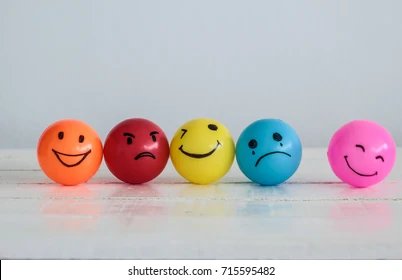

In [ ]:
# import yaml

# # Load the emotion data from the YAML file
# emotion_data = yaml.load(open('/content/Emotions_12/fear.yml', 'r'), Loader=yaml.FullLoader)


<IPython.core.display.Javascript object>

In [ ]:
import os
import re
import yaml

class EmotionDataParser:
    def __init__(self, emotion_dir):
        self.emotion_dir = emotion_dir
        self.parsed_data = []

    def extract_emotion_label(self, file_name):
        label_match = re.match(r'(.+?)\.yml', file_name)
        if label_match:
            return label_match.group(1)
        else:
            return 'Unknown'  # Default label if filename doesn't match

    def parse_emotion_file(self, file_name):
        # Read the content of the file and split it into conversations
        with open(os.path.join(self.emotion_dir, file_name), 'r') as file:
            content = file.read()
        # conversations = [conv.split('\n') for conv in content.split('\n\n')]
        data = yaml.load(content, Loader=yaml.FullLoader)
        print(data)
        # Extract emotion label from the file name
        emotion_label = self.extract_emotion_label(file_name)

        # Parse and store the data
        for conversation in data['conversations']:
            question = conversation[0]
            answers = conversation[1:]
            label = emotion_label
            self.parsed_data.append({'Question': question, 'Answers': answers, 'Label': label})

    def parse_all_emotion_files(self):
        for file_name in os.listdir(self.emotion_dir):
            if file_name.endswith('.yml'):
                self.parse_emotion_file(file_name)
        return self.parsed_data




<IPython.core.display.Javascript object>

In [ ]:
# Example usage:
emotion_dir = '/content/Emotions_12'
data_parser = EmotionDataParser(emotion_dir)
parsed_data = data_parser.parse_all_emotion_files()

<IPython.core.display.Javascript object>

{'categories': ['emptiness'], 'conversations': [['What Is Emptiness in the Mind?', "Emptiness in the mind is a profound sense of hollowness, like a void that can't be filled. It's when you feel disconnected from life's meaning and purpose, and every day seems like a blur.", "While it's a challenging emotion, it's crucial to acknowledge it and seek ways to find fulfillment and purpose once again."], ['I feel so alone and empty inside.', "Loneliness and emptiness often go hand in hand. The isolation of emptiness can be overwhelming, but remember, you're not alone in feeling this way.", 'Reaching out to friends, family, or professionals can help you navigate this emptiness and rediscover a sense of connection.'], ['What are the causes of emptiness in the mind?', 'Emptiness can stem from various sources, such as unresolved trauma, unfulfilled dreams, or the loss of something significant. Identifying these causes is essential to begin the healing process.', 'Exploring the root causes can le

In [ ]:
parsed_data[0]

{'categories': ['love'], 'conversations': [['What is love, and how is it defined?', 'Love is a complex and multifaceted emotion characterized by deep affection, care, compassion, and attachment to someone or something. It encompasses a wide range of feelings, from romantic love to platonic love.', 'Understand that love is a fundamental human experience with various forms and expressions.'], ['Can love be considered a universal human experience?', 'Yes, love is considered a universal human experience because it transcends cultural, linguistic, and geographical boundaries. People from all walks of life and backgrounds can experience and express love.', 'Recognize that love is a unifying and shared aspect of human existence.'], ['How does love manifest in different types of relationships?', 'Love manifests differently in various types of relationships. In romantic relationships, it may involve passion and romantic attachment, while in friendships, it can be characterized by trust, compani

<IPython.core.display.Javascript object>

{'Question': 'What Is Emptiness in the Mind?',
 'Answers': ["Emptiness in the mind is a profound sense of hollowness, like a void that can't be filled. It's when you feel disconnected from life's meaning and purpose, and every day seems like a blur.",
  "While it's a challenging emotion, it's crucial to acknowledge it and seek ways to find fulfillment and purpose once again."],
 'Label': 'emptiness'}

In [ ]:
for entry in parsed_data:
    entry['Answers'] = " ".join(entry['Answers'])

<IPython.core.display.Javascript object>

In [ ]:
parsed_data[0]

<IPython.core.display.Javascript object>

{'Question': 'What Is Emptiness in the Mind?',
 'Answers': "Emptiness in the mind is a profound sense of hollowness, like a void that can't be filled. It's when you feel disconnected from life's meaning and purpose, and every day seems like a blur. While it's a challenging emotion, it's crucial to acknowledge it and seek ways to find fulfillment and purpose once again.",
 'Label': 'emptiness'}

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_a = AutoTokenizer.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")
# model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

<IPython.core.display.Javascript object>

tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from datasets import Dataset
import pandas as pd
dataset_d = Dataset.from_pandas(pd.DataFrame(data=parsed_data))

<IPython.core.display.Javascript object>

In [ ]:
# Define a mapping from your dataset labels to the model's label IDs
dataset_label_to_model_label_id = {
    'jealousy': 2,
    'apathy': 27,
    'enthusiasm': 13,
    'lust': 8,
    'guilt': 24,
    'fear': 14,
    'joy': 17,
    'love': 18,
    'depression': 25,
    'regret': 9,
    'pride': 21,
    'emptiness': 27
}

# Update your dataset labels with the model's label IDs
for example in dataset_d:  # Replace this with your actual dataset object
    example['Label'] = dataset_label_to_model_label_id[example['Label']]


<IPython.core.display.Javascript object>

In [ ]:
dataset_d

<IPython.core.display.Javascript object>

Dataset({
    features: ['Question', 'Answers', 'Label'],
    num_rows: 563
})

In [ ]:
from transformers import AutoTokenizer

class DatasetTokenizer:
    def __init__(self, tokenizer, label_map):
        self.tokenizer = tokenizer
        self.label_map = label_map

    # Tokenize the dataset
    def tokenize_dataset(self, parsed_data):
        # Initialize an empty list to store tokenized data
        tokenized_data = []

        # Iterate through your parsed data
        for entry in parsed_data:
            question = entry['Question']
            answers = entry['Answers']
            label = entry['Label']

            # Create text inputs by joining the question and answers
            text_inputs = question + answers

            # Tokenize the text inputs
            tokens = self.tokenizer(text_inputs, truncation=True, padding='max_length')

            # Add the tokenized data along with the label to the list
            tokenized_data.append({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask'], 'label': label})

        tokenized_data = Dataset.from_pandas(pd.DataFrame(data=tokenized_data))

        return tokenized_data


    # Convert string labels to integer labels in the dataset
    def convert_labels(self, example):
        example["label"] = self.label_map[example["label"]]
        return example




<IPython.core.display.Javascript object>

In [ ]:
emotion_labels = []
for label_u in dataset_d['Label']:
    if label_u in emotion_labels:
      continue
    else:
      emotion_labels.append(label_u)

<IPython.core.display.Javascript object>

In [ ]:
emotion_labels

<IPython.core.display.Javascript object>

['emptiness',
 'depression',
 'apathy',
 'fear',
 'jealousy',
 'regret',
 'joy',
 'lust',
 'pride',
 'love',
 'guilt',
 'enthusiasm']

In [ ]:
# Create an instance of the DatasetTokenizer class
tokenizer = AutoTokenizer.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student", padding='max_length', truncation=True)  # Replace with your tokenizer
label_map = {
    'jealousy': 0,
    'apathy': 1,
    'enthusiasm': 2,
    'lust': 3,
    'guilt': 4,
    'fear': 5,
    'joy': 6,
    'love': 7,
    'depression': 8,
    'regret': 9,
    'pride': 10,
    'emptiness': 11
}

dataset_tokenizer = DatasetTokenizer(tokenizer, label_map)

# Tokenize the dataset
tokenized_dataset = dataset_tokenizer.tokenize_dataset(parsed_data)

# Convert labels if needed
tokenized_dataset = tokenized_dataset.map(dataset_tokenizer.convert_labels)


<IPython.core.display.Javascript object>

Map:   0%|          | 0/563 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset

<IPython.core.display.Javascript object>

Dataset({
    features: ['input_ids', 'attention_mask', 'label'],
    num_rows: 563
})

In [ ]:
tokenized_dataset['label'][45:70]

<IPython.core.display.Javascript object>

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

In [ ]:
# Split the tokenized dataset into training and validation sets (80% train, 20% validation)
split_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset['train']
eval_dataset = split_dataset['test']

<IPython.core.display.Javascript object>

In [ ]:
import torch
from transformers import TrainingArguments, Trainer

class EmotionClassificationTrainer:
    def __init__(self, model, tokenizer, train_dataset, eval_dataset, output_dir):
        self.model = model
        self.tokenizer = tokenizer
        self.train_dataset = train_dataset
        self.eval_dataset = eval_dataset
        self.output_dir = output_dir

    def train(self):
        # Define training arguments
        training_args = TrainingArguments(
            output_dir=self.output_dir,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            evaluation_strategy="steps",
            eval_steps=100,
            save_steps=100,
            num_train_epochs=3,
            save_total_limit=2,
            learning_rate=1e-5,
            load_best_model_at_end=True,
        )

        # Initialize Trainer
        trainer = Trainer(
            model=self.model,
            args=training_args,
            data_collator=None,  # You can customize this if needed
            train_dataset=self.train_dataset,
            eval_dataset=self.eval_dataset,
        )

        # Start training
        trainer.train()

        # Save the trained model
        self.model.save_pretrained(self.output_dir)
        self.tokenizer.save_pretrained(self.output_dir)

        # Evaluate the model on the evaluation dataset
        trainer.evaluate()

    def predict(self, text):
        # Tokenize the input text
        inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)                  #new line

        inputs = {name: tensor.to(model.device) for name, tensor in inputs.items()}

        # Make predictions
        with torch.no_grad():
            logits = self.model(**inputs).logits                       #new line

        # Convert logits to predicted class
        predicted_class = torch.argmax(logits, dim=1).item()

        # if predicted_class:
        #     predicted_emotion = intent_labels[predicted_class]
        # else:
        #     predicted_emotion = str(predicted_class)

        # return predicted_emotion
        return predicted_class




<IPython.core.display.Javascript object>

In [ ]:
# Define your model, tokenizer, training, and evaluation datasets

model = AutoModelForSequenceClassification.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student").to(device)
tokenizer = AutoTokenizer.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student", padding=True, truncation=True)

# Define your training and evaluation datasets (train_dataset and eval_dataset)

# Specify the output directory where the trained model will be saved
output_dir = "./emotion_classification_results"  # Replace with your desired output directory

# Create an instance of EmotionClassificationTrainer
emotion_trainer = EmotionClassificationTrainer(model, tokenizer, train_dataset, eval_dataset, output_dir)




<IPython.core.display.Javascript object>

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
label_map_emotions = model.config.id2label
print(label_map)

<IPython.core.display.Javascript object>

{'jealousy': 0, 'apathy': 1, 'enthusiasm': 2, 'lust': 3, 'guilt': 4, 'fear': 5, 'joy': 6, 'love': 7, 'depression': 8, 'regret': 9, 'pride': 10, 'emptiness': 11}


In [ ]:
emotion_trainer.train()


<IPython.core.display.Javascript object>

Step,Training Loss,Validation Loss


In [ ]:
emotion_trainer.predict("I've been feeling really stressed out lately, and I'm not sure how to cope with it.")

<IPython.core.display.Javascript object>

19

In [ ]:
emotion_trainer.predict("Hey doc, so tell me this, how does the mental health of a person affect after watching a disturbing documentary?")

<IPython.core.display.Javascript object>

7

In [ ]:
label_map_emotions[emotion_trainer.predict("I am happy and sad at the same time")]

<IPython.core.display.Javascript object>

'realization'

In [ ]:
e_prediction_label = emotion_trainer.predict("I just received some unexpected news. On one hand, it's incredibly exciting, and I'm filled with joy. On the other hand, it's a bit overwhelming, and I'm feeling a mix of happiness and nervousness. How should I process all these emotions?")
e_prediction_label

<IPython.core.display.Javascript object>

13

In [ ]:
label_map_emotions[e_prediction_label]

<IPython.core.display.Javascript object>

'excitement'

# Response Generation Model - **GODEL**

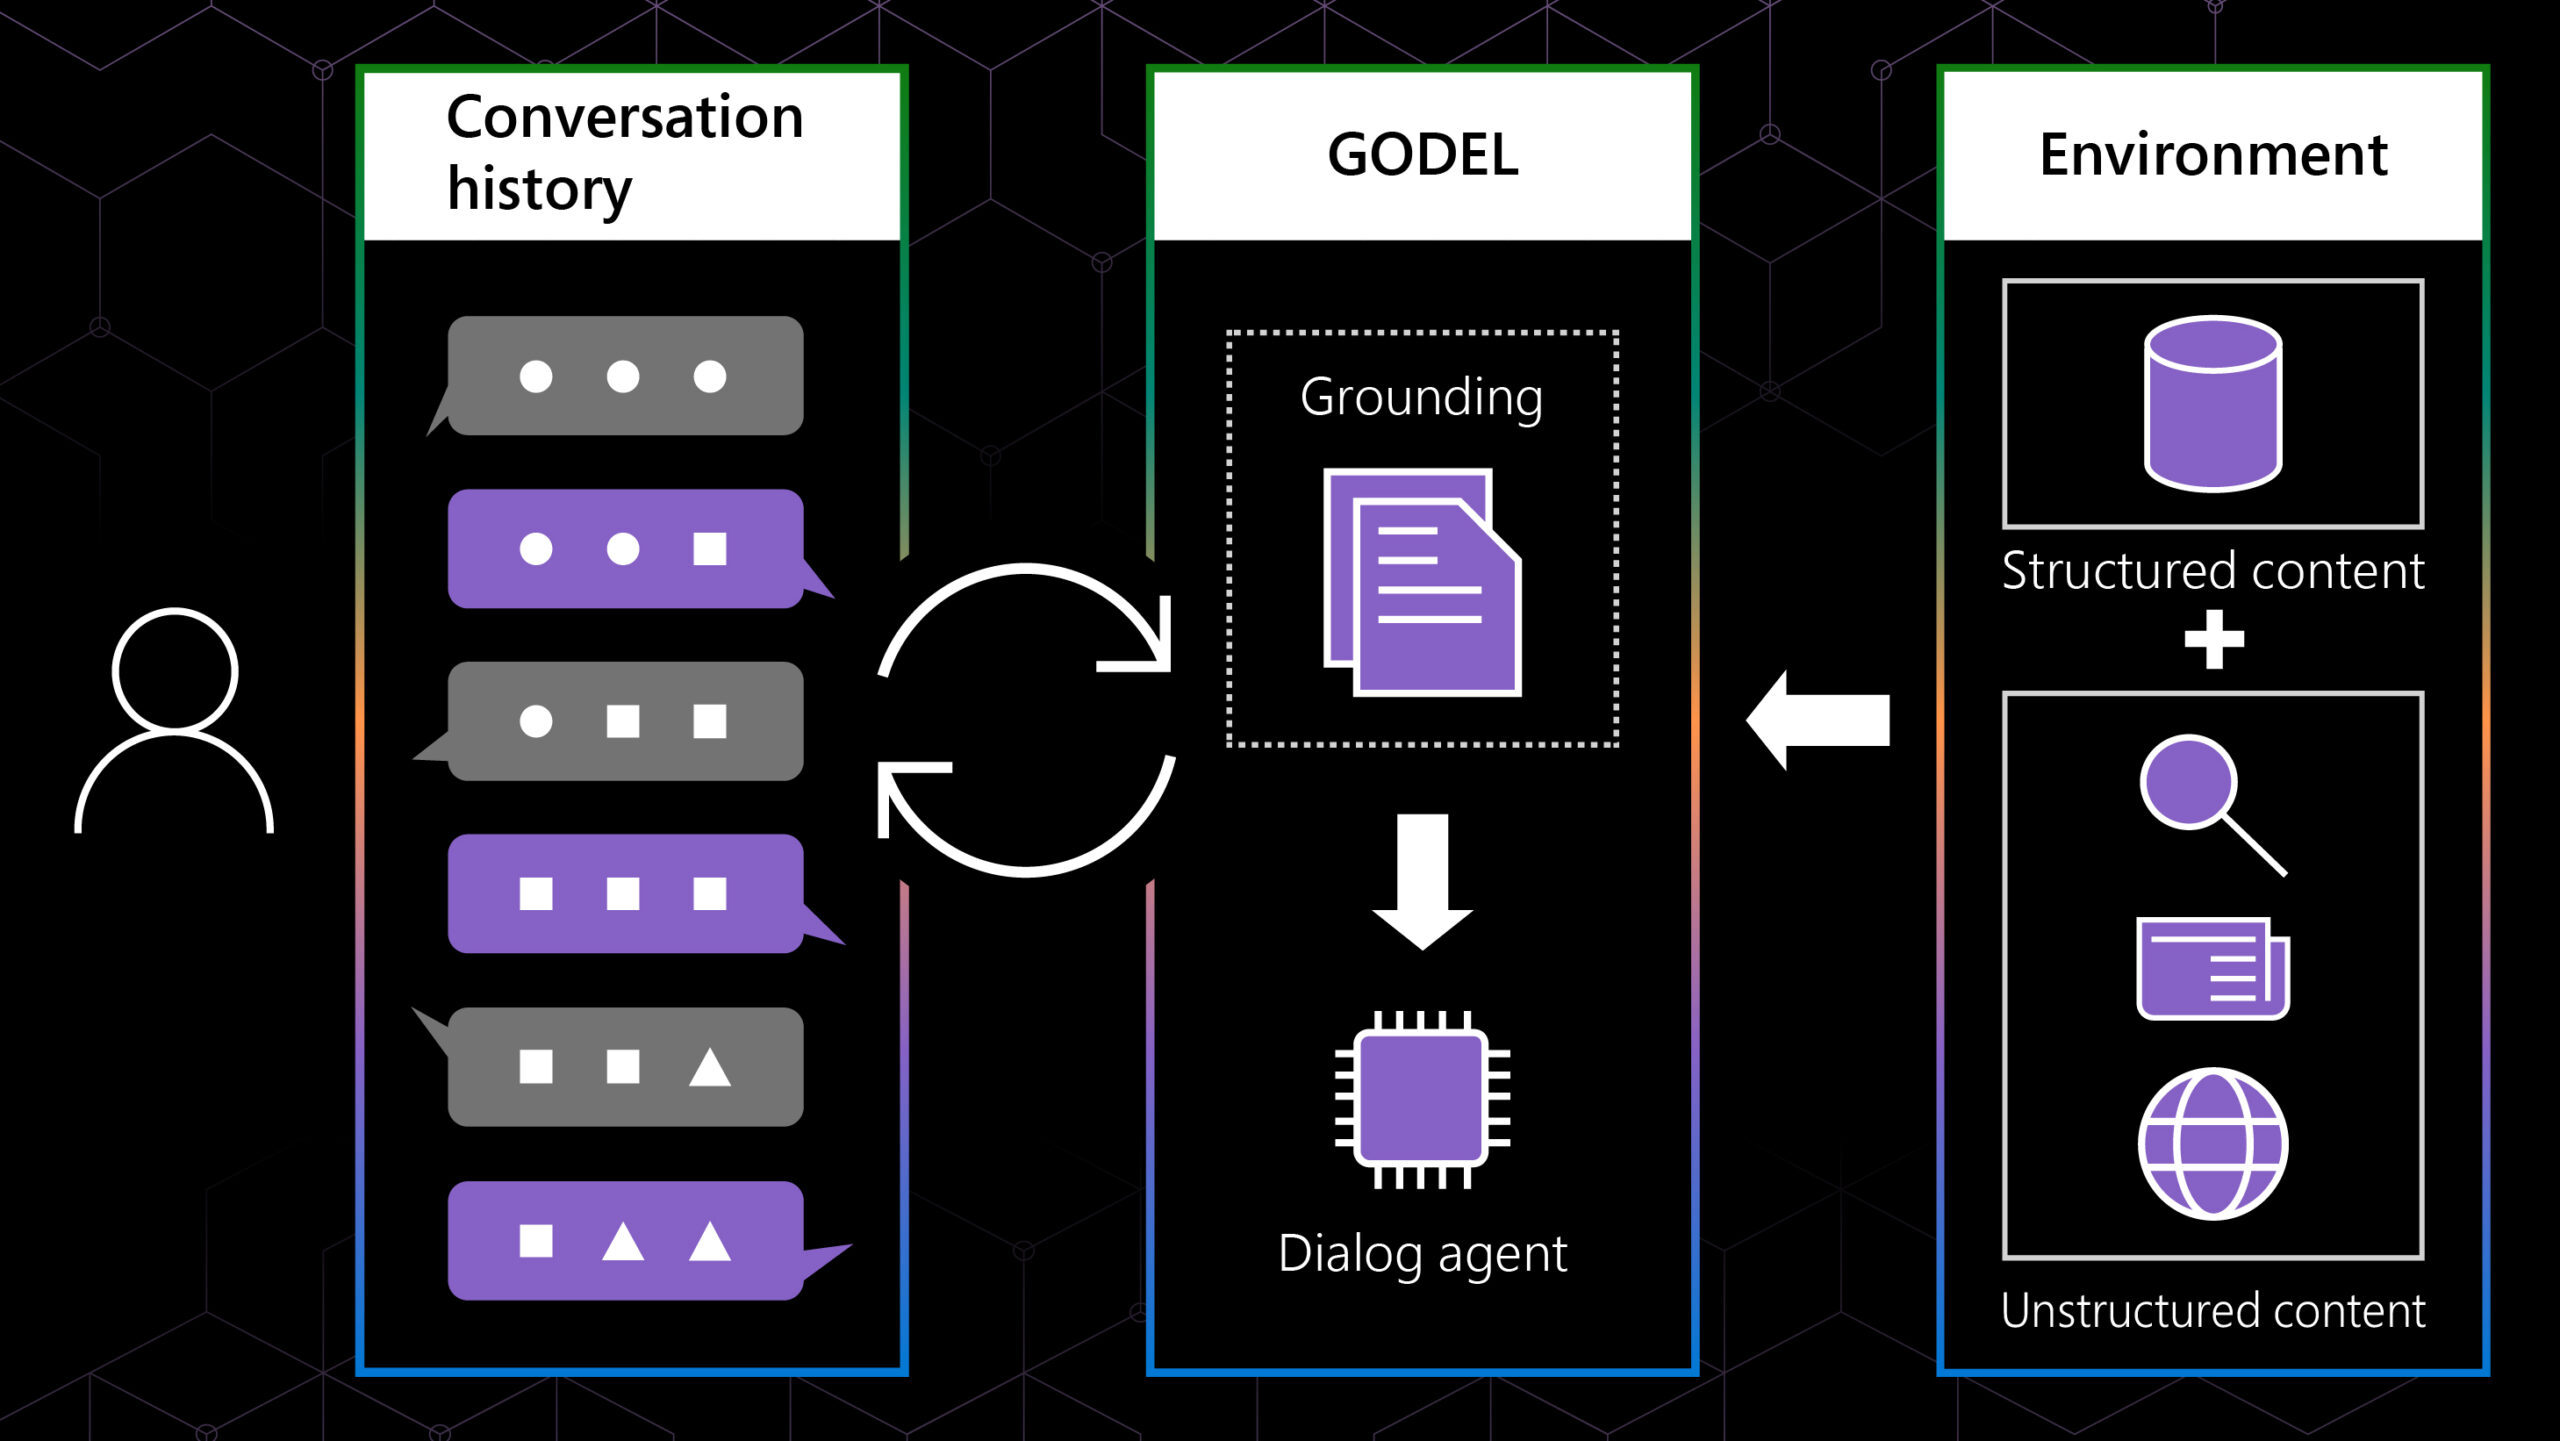

GODEL (GPT-OpenAI-Dialog-Emotion-Language Model): GODEL is a versatile transformer-based language model by OpenAI.

GODEL is primarily focused on tasks related to dialogue, emotion analysis, and language understanding. In contrast, DialoGPT is tailored for natural language understanding and generation in conversational contexts.

## Data loading and preprocessing
Here, we have taken two datasets, both datasets are conversational datasets about mental health and counselling.

1. dataset_1 - [https://huggingface.co/datasets/Amod/mental_health_counseling_conversations](https://)

2. dataset_2 - [https://huggingface.co/datasets/tolu07/Mental_Health_FAQ](https://)

In [1]:
from datasets import load_dataset

dataset1 = load_dataset("Amod/mental_health_counseling_conversations")
dataset2 = load_dataset("tolu07/Mental_Health_FAQ")

In [2]:
import pandas as pd
df1 = pd.DataFrame(dataset1['train'])  # Replace 'train' with 'test' or 'validation' if needed
df2 = pd.DataFrame(dataset2['train'])

# we are just viewing the data using DataFrame object, we'll be using transformers dataset object for further processes

In [3]:
df1.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...


In [4]:
df2.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [5]:
print(f"df1 null values: {df1.isna().sum().sum()}\ndf2 null values: {df1.isna().sum().sum()}")

df1 null values: 0
df2 null values: 0


In [6]:
dataset1_d = dataset1['train']
dataset1_d

Dataset({
    features: ['Context', 'Response'],
    num_rows: 3512
})

In [7]:
dataset2_d = dataset2['train']
dataset2_d

Dataset({
    features: ['Question_ID', 'Questions', 'Answers'],
    num_rows: 98
})

In [8]:
# Drop 'Question_ID' and rename columns in dataset2
from datasets import Dataset, DatasetDict, concatenate_datasets
dataset2_d = dataset2_d.remove_columns(['Question_ID'])
dataset2_d = dataset2_d.rename_column('Questions', 'Context')
dataset2_d = dataset2_d.rename_column('Answers', 'Response')

# Merge datasets
dataset_f = concatenate_datasets([dataset1_d, dataset2_d])

In [9]:
dataset_f

Dataset({
    features: ['Context', 'Response'],
    num_rows: 3610
})

 trial tokenizing

In [10]:
from transformers import AutoTokenizer
MAX_TOKENS = 510
tokenizer = AutoTokenizer.from_pretrained("microsoft/GODEL-v1_1-large-seq2seq", padding='max_length', truncation=True, max_length=MAX_TOKENS)

In [11]:
def tokenize_function(examples):
    inputs = tokenizer(examples['Context'], max_length=MAX_TOKENS, padding='max_length', truncation=True)
    targets = tokenizer(examples['Response'], max_length=MAX_TOKENS, padding='max_length', truncation=True)
    return {'input_ids': inputs['input_ids'], 'attention_mask': inputs['attention_mask'], 'decoder_input_ids': targets['input_ids']}

In [12]:
tokenized_dataset = dataset_f.map(tokenize_function, batched=True)

In [13]:
tokenized_dataset = tokenized_dataset.rename_column("decoder_input_ids", "labels")

In [14]:
tokenized_dataset

Dataset({
    features: ['Context', 'Response', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 3610
})

***Tokenizing and splitting the dataset***

In [ ]:
from transformers import AutoTokenizer
MAX_TOKENS = 510
tokenizer = AutoTokenizer.from_pretrained("microsoft/GODEL-v1_1-large-seq2seq", padding='max_length', truncation=True, max_length=MAX_TOKENS)
# tokenized_dataset_tokens = dataset_f.map(lambda examples: tokenizer(examples['Context'], examples['Response']), batched=True)


In [27]:
# tokenized_dataset_tokens

<IPython.core.display.Javascript object>

NameError: ignored

In [15]:
# split_dataset = tokenized_dataset_tokens.train_test_split(test_size=0.2, seed=42)
# train_dataset_tokens = split_dataset['train']
# eval_dataset_tokens = split_dataset['test']

split_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=42)
train_dataset_tokens = split_dataset['train']
eval_dataset_tokens = split_dataset['test']

## Fine Tuning/training the dataset

In [ ]:
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
# from datasets import load_dataset, load_metric

# class GodelTrainer:
#     def __init__(self, model_name, dataset):
#         self.tokenizer = AutoTokenizer.from_pretrained(model_name)
#         self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)
#         self.dataset = dataset

#     def tokenize_dataset(self):
#         # Tokenize the dataset
#         tokenized_datasets = self.dataset.map(
#             lambda examples: self.tokenizer(examples['Context'], examples['Response']),
#             batched=True,
#         )
#         return tokenized_datasets

#     def train_model(self, epochs=5, batch_size=4):
#         # Tokenize the dataset
#         tokenized_datasets = self.tokenize_dataset()

#         # Define training arguments
#         training_args = Seq2SeqTrainingArguments(
#             output_dir="./godel-finetuned",
#             per_device_train_batch_size=batch_size,
#             save_total_limit=5,
#             num_train_epochs=epochs,
#             predict_with_generate=True,
#             logging_dir="./logs",
#             logging_steps=100,
#         )

#         # Define metric for evaluation
#         metric = load_metric("sacrebleu")

#         # Define trainer
#         trainer = Seq2SeqTrainer(
#             model=self.model,
#             args=training_args,
#             train_dataset=tokenized_datasets,
#             data_collator=self.model.data_collator,
#             tokenizer=self.tokenizer,
#             compute_metrics=metric,
#         )

#         # Train the model
#         trainer.train()




<IPython.core.display.Javascript object>

In [16]:
from transformers import Trainer, TrainingArguments, pipeline, DataCollatorForSeq2Seq
import torch
from datasets import load_metric, DatasetDict, Dataset
import evaluate

class GODELTrainer:
    def __init__(self, model, tokenizer, train_dataset_tokens, eval_dataset_tokens, epochs=5, batch_size=1, output_dir='./godel_model', data_collator=None):
        self.model = model
        self.tokenizer = tokenizer
        self.train_dataset_tokens = train_dataset_tokens
        self.eval_dataset_tokens = eval_dataset_tokens
        self.epochs = epochs
        self.batch_size = batch_size
        self.output_dir = output_dir
        self.data_collator = data_collator


    def train(self):

        # train_dataset_tokens = self.tokenize_dataset(self.train_dataset)
        # eval_dataset_tokens = self.tokenize_dataset(self.eval_dataset)

        training_args = TrainingArguments(
            output_dir=self.output_dir,
            num_train_epochs=self.epochs,
            per_device_train_batch_size=self.batch_size,
            save_steps=500,
            save_total_limit=2,
            learning_rate=5e-5,
            weight_decay=0.01,
            push_to_hub=False,
            logging_dir='./logs',
            logging_steps=100,
        )

        # Define metric for evaluation
        metric = evaluate.load("accuracy")

        #  # Use DataCollatorForSeq2Seq for batching and collating
        # data_collator = DataCollatorForSeq2Seq(tokenizer=self.tokenizer, model=self.model)

        trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=train_dataset_tokens,
            eval_dataset=eval_dataset_tokens,
            compute_metrics=metric,
            data_collator=data_collator,
            # tokenizer=self.tokenizer,
        )

        # Train the model
        trainer.train()

        # Save the model
        self.save_model()

    def save_model(self):
        # Save the quantized model to the Colab storage session
        self.model = torch.quantization.convert(self.model.eval(), inplace=False)
        self.model.save_pretrained(self.output_dir)



In [29]:
! pip install -q evaluate

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.1 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

<IPython.core.display.Javascript object>

Fri Dec  1 15:52:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
# Assuming train_dataset and eval_dataset are DatasetDict objects
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForLanguageModeling, DataCollatorForSeq2Seq


# data_collator = DataCollatorForLanguageModeling(
#     tokenizer=tokenizer, mlm=False, mlm_probability=0.15
# )

# Instantiate DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer)

trainer = GODELTrainer(
        model=AutoModelForSeq2SeqLM.from_pretrained("microsoft/GODEL-v1_1-large-seq2seq").to(device),
        tokenizer=AutoTokenizer.from_pretrained("microsoft/GODEL-v1_1-large-seq2seq"),
        train_dataset_tokens=train_dataset_tokens,
        eval_dataset_tokens=eval_dataset_tokens,
        epochs=5,
        batch_size=1,
        output_dir='./godel_model',
        data_collator = data_collator
)



In [ ]:
trainer.train()

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
# Initialize and train the GodelTrainer
# godel_trainer = GodelTrainer("microsoft/GODEL-v1_1-large-seq2seq", dataset_f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
# godel_trainer.train_model()

<IPython.core.display.Javascript object>

In [ ]:
# def construct_conv(row, tokenizer, eos = True):
#     flatten = lambda l: [item for sublist in l for item in sublist]
#     conv = list(reversed([tokenizer.encode(x) + [tokenizer.eos_token_id] for x in row]))
#     conv = flatten(conv)
#     return conv

<IPython.core.display.Javascript object>

In [ ]:
# examples = []
# for _, row in df.iterrows():
#     conv = construct_conv(row, tokenizer)
#     examples.append(conv)

<IPython.core.display.Javascript object>

Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors


## Fine tuning using source code

In [ ]:
! pip install -q python-dotenv

<IPython.core.display.Javascript object>

In [ ]:
! pip install -q wandb

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
#!/usr/bin/env python
#  coding=utf-8
#  Copyright (c) Microsoft Corporation.
#  Licensed under the MIT license.
"""
Fine-tuning a DialoGLM model to a downstream task
"""

import argparse
import logging
import math
import os
import random
import json

import datasets
import nltk
import numpy as np
import torch
from datasets import load_dataset, load_metric
from torch.utils.data.dataloader import DataLoader
from tqdm.auto import tqdm

import transformers
from accelerate import Accelerator
from filelock import FileLock
from transformers import (
    CONFIG_MAPPING,
    MODEL_MAPPING,
    AdamW,
    AutoConfig,
    AutoModelForSeq2SeqLM,
    AutoTokenizer,
    DataCollatorForSeq2Seq,
    SchedulerType,
    get_scheduler,
    set_seed,
)

from utils.text_normalization import normalize_answer
from dotenv import load_dotenv

# Load pre-defined environment variable
load_dotenv()

logger = logging.getLogger(__name__)

if os.getenv('WANDB_API_KEY') is None:
    USE_WANDB = False
else:
    USE_WANDB = True
    wandb_key = os.getenv('WANDB_API_KEY')

# You should update this to your particular problem to have better documentation of `model_type`
MODEL_CONFIG_CLASSES = list(MODEL_MAPPING.keys())
MODEL_TYPES = tuple(conf.model_type for conf in MODEL_CONFIG_CLASSES)

<IPython.core.display.Javascript object>

In [ ]:
# model_name_or_path = "microsoft/GODEL-v1_1-large-seq2seq"  # replace with your model name or path
# dataset_name = "Amod/mental_health_counseling_conversations"  # replace with your dataset name

<IPython.core.display.Javascript object>

In [ ]:
def parse_args():
    parser = argparse.ArgumentParser(description="Finetune a transformers model on a text classification task")
    parser.add_argument(
        "Amod/mental_health_counseling_conversations",                  # dataset name
        type=str,
        default=None,
        help="The name of the dataset to use (via the datasets library).",
    )
    parser.add_argument(
        "--dataset_config_name",
        type=str,
        default=None,
        help="The configuration name of the dataset to use (via the datasets library).",
    )
    parser.add_argument(
        "--train_file", type=str, default=None, help="A csv or a json file containing the training data."
    )
    parser.add_argument(
        "--validation_file", type=str, default=None, help="A csv or a json file containing the validation data."
    )
    parser.add_argument(
        "--test_file", type=str, default=None, help="A csv or a json file containing the test data."
    )
    parser.add_argument(
        "--max_source_length",
        type=int,
        default=1024,
        help="The maximum total input sequence length after "
        "tokenization.Sequences longer than this will be truncated, sequences shorter will be padded.",
    )
    parser.add_argument(
        "--source_prefix",
        type=str,
        default=None,
        help="A prefix to add before every source text " "(useful for T5 models).",
    )
    parser.add_argument(
        "--preprocessing_num_workers",
        type=int,
        default=None,
        help="The number of processes to use for the preprocessing.",
    )
    parser.add_argument(
        "--max_target_length",
        type=int,
        default=64,
        help="The maximum total sequence length for target text after "
        "tokenization. Sequences longer than this will be truncated, sequences shorter will be padded."
        "during ``evaluate`` and ``predict``.",
    )
    parser.add_argument(
        "--val_max_target_length",
        type=int,
        default=None,
        help="The maximum total sequence length for validation "
        "target text after tokenization.Sequences longer than this will be truncated, sequences shorter will be "
        "padded. Will default to `max_target_length`.This argument is also used to override the ``max_length`` "
        "param of ``model.generate``, which is used during ``evaluate`` and ``predict``.",
    )
    parser.add_argument(
        "--num_beams",
        type=int,
        default=None,
        help="Number of beams to use for evaluation. This argument will be "
        "passed to ``model.generate``, which is used during ``evaluate`` and ``predict``.",
    )
    parser.add_argument(
        "--t5-base",                             #model name
        type=str,
        help="Path to pretrained model or model identifier from huggingface.co/models.",
        required=True,
    )
    parser.add_argument(
        "--config_name",
        type=str,
        default=None,
        help="Pretrained config name or path if not the same as model_name",
    )
    parser.add_argument(
        "--tokenizer_name",
        type=str,
        default=None,
        help="Pretrained tokenizer name or path if not the same as model_name",
    )
    parser.add_argument(
        "--text_column",
        type=str,
        default=None,
        help="The name of the column in the datasets containing the full texts (for summarization).",
    )
    parser.add_argument(
        "--summary_column",
        type=str,
        default=None,
        help="The name of the column in the datasets containing the summaries (for summarization).",
    )
    parser.add_argument(
        "--use_slow_tokenizer",
        action="store_true",
        help="If passed, will use a slow tokenizer (not backed by the 🤗 Tokenizers library).",
    )
    parser.add_argument(
        "--per_device_train_batch_size",
        type=int,
        default=8,
        help="Batch size (per device) for the training dataloader.",
    )
    parser.add_argument(
        "--per_device_eval_batch_size",
        type=int,
        default=8,
        help="Batch size (per device) for the evaluation dataloader.",
    )
    parser.add_argument(
        "--learning_rate",
        type=float,
        default=5e-5,
        help="Initial learning rate (after the potential warmup period) to use.",
    )
    parser.add_argument("--weight_decay", type=float, default=0.0, help="Weight decay to use.")
    parser.add_argument("--num_train_epochs", type=int, default=3, help="Total number of training epochs to perform.")
    parser.add_argument(
        "--max_train_steps",
        type=int,
        default=None,
        help="Total number of training steps to perform. If provided, overrides num_train_epochs.",
    )
    parser.add_argument(
        "--gradient_accumulation_steps",
        type=int,
        default=1,
        help="Number of updates steps to accumulate before performing a backward/update pass.",
    )
    parser.add_argument(
        "--lr_scheduler_type",
        type=SchedulerType,
        default="linear",
        help="The scheduler type to use.",
        choices=["linear", "cosine", "cosine_with_restarts", "polynomial", "constant", "constant_with_warmup"],
    )
    parser.add_argument(
        "--num_warmup_steps", type=int, default=0, help="Number of steps for the warmup in the lr scheduler."
    )
    parser.add_argument("--output_dir", type=str, default=None, help="Where to store the final model.")
    parser.add_argument("--seed", type=int, default=None, help="A seed for reproducible training.")
    parser.add_argument(
        "--model_type",
        type=str,
        default=None,
        help="Model type to use if training from scratch.",
        choices=MODEL_TYPES,
    )
    parser.add_argument(
        "--overwrite_cache", type=bool, default=False, help="Overwrite the cached training and evaluation sets"
    )
    parser.add_argument(
        "--max_length", type=int, default=128, help="max length"
    )
    parser.add_argument(
        "--pad_to_max_length", type=bool, default=True, help="do pading"
    )
    parser.add_argument(
        "--ignore_pad_token_for_loss", type=bool, default=True, help="do pading"
    )
    parser.add_argument(
        "--logging_steps", type=int, default=500, help="do pading"
    )
    parser.add_argument(
        "--save_steps", type=int, default=5000, help="do pading"
    )
    parser.add_argument(
        "--save_every_checkpoint", action="store_true"
    )
    parser.add_argument(
        "--max_grad_norm", type=float, default=1.0, help="max_grad_norm"
    )
    parser.add_argument(
        "--no_kb", action="store_true"
    )
    parser.add_argument(
        "--exp_name",
        type=str,
        help="Description to the experiment",
        default='exp',
    )
    parser.add_argument(
        "--wandb_exp_name",
        type=str,
        default='DialoGLM',
        help="Description to the experiment worksheet name",
    )

    args = parser.parse_args()                          # new line

    # Sanity checks
    if args.dataset_name is None and args.train_file is None and args.validation_file is None:
        raise ValueError("Need either a dataset name or a training/validation file.")
    else:
        if args.train_file is not None:
            extension = args.train_file.split(".")[-1]
            assert extension in ["csv", "json"], "`train_file` should be a csv or a json file."
        if args.validation_file is not None:
            extension = args.validation_file.split(".")[-1]
            assert extension in ["csv", "json"], "`validation_file` should be a csv or a json file."

    if args.output_dir is not None:
        os.makedirs(args.output_dir, exist_ok=True)

    return args




def main():
    args = parse_args()

    if args.source_prefix is None and args.model_name_or_path in [
        "t5-small",
        "t5-base",
        "t5-large",
        "t5-3b",
        "t5-11b",
    ]:
        logger.warning(
            "You're running a t5 model but didn't provide a source prefix, which is the expected, e.g. with "
            "`--source_prefix 'summarize: ' `"
        )
    # Initialize the accelerator. We will let the accelerator handle device placement for us in this example.
    accelerator = Accelerator()
    # Make one log on every process with the configuration for debugging.
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )
    logger.info(accelerator.state)

    # Setup logging, we only want one process per machine to log things on the screen.
    # accelerator.is_local_main_process is only True for one process per machine.
    logger.setLevel(logging.INFO if accelerator.is_local_main_process else logging.ERROR)
    if accelerator.is_local_main_process:
        datasets.utils.logging.set_verbosity_warning()
        transformers.utils.logging.set_verbosity_info()
    else:
        datasets.utils.logging.set_verbosity_error()
        transformers.utils.logging.set_verbosity_error()

    # If passed along, set the training seed now.
    if args.seed is not None:
        set_seed(args.seed)

    if accelerator.is_local_main_process and USE_WANDB:
        config = dict(
        dataset_id = "DialoGLM",
        infra = "aml",
        )
        import wandb
        wandb.init(
        project=args.wandb_exp_name,
        notes="Finetuning",
        tags=["DialoGLM"],
        config=config,
        entity= 'DialoGLM')
        wandb.run.name = args.exp_name

    # Get the datasets: you can either provide your own CSV/JSON/TXT training and evaluation files (see below)
    # or just provide the name of one of the public datasets available on the hub at https://huggingface.co/datasets/
    # (the dataset will be downloaded automatically from the datasets Hub).
    #
    # For CSV/JSON files, this script will use the column called 'text' or the first column if no column called
    # 'text' is found. You can easily tweak this behavior (see below).
    #
    # In distributed training, the load_dataset function guarantee that only one local process can concurrently
    # download the dataset.
    if args.dataset_name is not None:
        # Downloading and loading a dataset from the hub.
        raw_datasets = load_dataset(args.dataset_name, args.dataset_config_name)
    else:
        data_files = {}
        if args.train_file is not None:
            data_files["train"] = args.train_file
        if args.validation_file is not None:
            data_files["validation"] = args.validation_file
        if args.test_file is not None:
            data_files["test"] = args.test_file
        extension = args.train_file.split(".")[-1]
        raw_datasets = load_dataset(extension, data_files=data_files)
    # See more about loading any type of standard or custom dataset (from files, python dict, pandas DataFrame, etc) at
    # https://huggingface.co/docs/datasets/loading_datasets.html.

    # Load pretrained model and tokenizer
    #
    # In distributed training, the .from_pretrained methods guarantee that only one local process can concurrently
    # download model & vocab.
    if args.config_name:
        config = AutoConfig.from_pretrained(args.config_name)
    elif args.model_name_or_path:
        config = AutoConfig.from_pretrained(args.model_name_or_path)
    else:
        config = CONFIG_MAPPING[args.model_type]()
        logger.warning("You are instantiating a new config instance from scratch.")

    if args.tokenizer_name:
        tokenizer = AutoTokenizer.from_pretrained(args.tokenizer_name, use_fast=not args.use_slow_tokenizer)
    elif args.model_name_or_path:
        tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path, use_fast=not args.use_slow_tokenizer)
    else:
        raise ValueError(
            "You are instantiating a new tokenizer from scratch. This is not supported by this script."
            "You can do it from another script, save it, and load it from here, using --tokenizer_name."
        )

    if args.model_name_or_path:
        model = AutoModelForSeq2SeqLM.from_pretrained(
            args.model_name_or_path,
            from_tf=bool(".ckpt" in args.model_name_or_path),
            config=config,
        )
    else:
        logger.info("Training new model from scratch")
        model = AutoModelForSeq2SeqLM.from_config(config)

    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))
    if model.config.decoder_start_token_id is None:
        raise ValueError("Make sure that `config.decoder_start_token_id` is correctly defined")

    padding = "max_length" if args.pad_to_max_length else False
    max_target_length = args.max_target_length
    def dataset_mapping_function(examples):
        contextes = examples['Context']
        responses = examples['Response']
        kbs = examples['Knowledge']

        inputs = []
        for context, kb in zip(contextes, kbs):
            if args.no_kb:
                inputs.append(context + ' => ')
            else:
                _input = context + ' <|Knowledge|> ' + kb + ' => '
                inputs.append(_input)
        model_inputs = tokenizer(inputs, max_length=args.max_length, padding=padding, truncation=True)

        # Setup the tokenizer for targets
        with tokenizer.as_target_tokenizer():
            labels = tokenizer(responses, max_length=max_target_length, padding=padding, truncation=True)

        # If we are padding here, replace all tokenizer.pad_token_id in the labels by -100 when we want to ignore
        # padding in the loss.
        if padding == "max_length" and args.ignore_pad_token_for_loss:
            labels["labels"] = [
                [(l if l != tokenizer.pad_token_id else -100) for l in label] for label in labels["input_ids"]
            ]

        model_inputs["labels"] = labels["labels"]
        return model_inputs

    # Note that with `batched=True`, this map processes 1,000 texts together, so group_texts throws away a remainder
    # for each of those groups of 1,000 texts. You can adjust that batch_size here but a higher value might be slower
    # to preprocess.
    #
    # To speed up this part, we use multiprocessing. See the documentation of the map method for more information:
    # https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasets.Dataset.map

    column_names = ['Context','Response','Knowledge']
    lm_datasets = raw_datasets.map(
        dataset_mapping_function,
        batched=True,
        remove_columns=column_names,
        num_proc=args.preprocessing_num_workers,
        load_from_cache_file=False,
        desc=f"Processing dataset",
    )

    train_dataset = lm_datasets["train"]
    eval_dataset = lm_datasets["validation"]
    test_dataset = lm_datasets["test"]

    # Log a few random samples from the training set:
    for index in random.sample(range(len(train_dataset)), 1):
        logger.info(f"Sample {index} of the training set: {train_dataset[index]}.")

    label_pad_token_id = -100 if args.ignore_pad_token_for_loss else tokenizer.pad_token_id
    data_collator = DataCollatorForSeq2Seq(
        tokenizer,
        model=model,
        label_pad_token_id=label_pad_token_id,
        pad_to_multiple_of=8 if accelerator.use_fp16 else None,
    )

    def postprocess_text(preds, labels):
        preds = [normalize_answer(pred.strip()) for pred in preds]
        labels = [normalize_answer(label.strip()) for label in labels]

        return preds, labels

    train_dataloader = DataLoader(
        train_dataset, shuffle=True, collate_fn=data_collator, batch_size=args.per_device_train_batch_size
    )
    eval_dataloader = DataLoader(eval_dataset, collate_fn=data_collator, batch_size=args.per_device_eval_batch_size)
    test_dataloader = DataLoader(test_dataset, collate_fn=data_collator, batch_size=args.per_device_eval_batch_size)

    # Optimizer
    # Split weights in two groups, one with weight decay and the other not.
    no_decay = ["bias", "LayerNorm.weight"]
    optimizer_grouped_parameters = [
        {
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": args.weight_decay,
        },
        {
            "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
            "weight_decay": 0.0,
        },
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=args.learning_rate)

    # Prepare everything with our `accelerator`.
    model, optimizer, train_dataloader, eval_dataloader, test_dataloader = accelerator.prepare(
        model, optimizer, train_dataloader, eval_dataloader, test_dataloader
    )

    # Note -> the training dataloader needs to be prepared before we grab his length below (cause its length will be
    # shorter in multiprocess)

    # Scheduler and math around the number of training steps.
    num_update_steps_per_epoch = math.ceil(len(train_dataloader) / args.gradient_accumulation_steps)
    if args.max_train_steps is None:
        args.max_train_steps = args.num_train_epochs * num_update_steps_per_epoch
    else:
        args.num_train_epochs = math.ceil(args.max_train_steps / num_update_steps_per_epoch)

    lr_scheduler = get_scheduler(
        name=args.lr_scheduler_type,
        optimizer=optimizer,
        num_warmup_steps=args.num_warmup_steps,
        num_training_steps=args.max_train_steps,
    )

    # Train!
    total_batch_size = args.per_device_train_batch_size * accelerator.num_processes * args.gradient_accumulation_steps

    logger.info("***** Running training *****")
    logger.info(f"  Num examples = {len(train_dataset)}")
    logger.info(f"  Num Epochs = {args.num_train_epochs}")
    logger.info(f"  Instantaneous batch size per device = {args.per_device_train_batch_size}")
    logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
    logger.info(f"  Gradient Accumulation steps = {args.gradient_accumulation_steps}")
    logger.info(f"  Total optimization steps = {args.max_train_steps}")
    # Only show the progress bar once on each machine.
    progress_bar = tqdm(range(args.max_train_steps), disable=not accelerator.is_local_main_process)
    completed_steps = 0
    global_steps = 0
    tr_loss, logging_loss = 0.0, 0.0
    for epoch in range(args.num_train_epochs):
        model.train()
        for step, batch in enumerate(train_dataloader):
            global_steps += 1
            outputs = model(**batch)
            loss = outputs.loss
            loss = loss / args.gradient_accumulation_steps
            tr_loss += loss.item()
            accelerator.backward(loss)

            if step % args.gradient_accumulation_steps == 0 or step == len(train_dataloader) - 1:
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()
                completed_steps += 1

            if completed_steps >= args.max_train_steps:
                break

            if step % args.logging_steps == 0:
                logger.info(f"  EVALERR:  {(tr_loss - logging_loss)/float(args.logging_steps)}")
                if accelerator.is_local_main_process and USE_WANDB:
                    wandb.log({'loss': tr_loss - logging_loss})
                logging_loss = tr_loss
                progress_bar.update(args.logging_steps)

            if args.output_dir is not None and global_steps % args.save_steps == 0 and global_steps > 0:
                accelerator.wait_for_everyone()
                if accelerator.is_local_main_process:
                    checkpoint_prefix = 'checkpoint'
                    output_dir = os.path.join(args.output_dir, '{}-{}'.format(checkpoint_prefix, global_steps))
                    if not os.path.exists(output_dir):
                        os.makedirs(output_dir)
                    unwrapped_model = accelerator.unwrap_model(model)
                    unwrapped_model.save_pretrained(output_dir, save_function=accelerator.save)

                    tokenizer.save_pretrained(output_dir)
                    torch.save(args, os.path.join(output_dir, 'training_args.bin'))
                    logger.info("Saving model checkpoint to %s", output_dir)

        model.eval()

        gen_kwargs = {
            "max_length": config.max_length,
            "num_beams": args.num_beams,
        }

        def evaluate_data(dataloader, eval_name='valid'):

            metric_rouge = load_metric("./utils/rouge_metric.py")
            metric_bleu = load_metric("./utils/bleu_metric.py")

            decoded_preds_all = []
            for step, batch in enumerate(dataloader):
                with torch.no_grad():
                    generated_tokens = accelerator.unwrap_model(model).generate(
                        batch["input_ids"],
                        attention_mask=batch["attention_mask"],
                        **gen_kwargs,
                    )

                    generated_tokens = accelerator.pad_across_processes(
                        generated_tokens, dim=1, pad_index=tokenizer.pad_token_id
                    )
                    labels = batch["labels"]
                    if not args.pad_to_max_length:
                        # If we did not pad to max length, we need to pad the labels too
                        labels = accelerator.pad_across_processes(batch["labels"], dim=1, pad_index=tokenizer.pad_token_id)

                    generated_tokens = accelerator.gather(generated_tokens).cpu().numpy()
                    labels = accelerator.gather(labels).cpu().numpy()

                    if args.ignore_pad_token_for_loss:
                        # Replace -100 in the labels as we can't decode them.
                        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
                    if isinstance(generated_tokens, tuple):
                        generated_tokens = generated_tokens[0]
                    decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
                    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

                    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
                    metric_rouge.add_batch(predictions=decoded_preds, references=decoded_labels)
                    _decoded_preds = [i.split() for i in decoded_preds]
                    _decoded_labels = [[i.split()] for i in decoded_labels]
                    decoded_preds_all.extend(_decoded_preds)
                    metric_bleu.add_batch(predictions=_decoded_preds, references=_decoded_labels)

            result = metric_rouge.compute(use_stemmer=True)
            result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
            result = {k: round(v, 4) for k, v in result.items()}
            logger.info(result)

            result_bleu = metric_bleu.compute()
            logger.info(result_bleu)

            accelerator.wait_for_everyone()
            if accelerator.is_local_main_process and USE_WANDB:
                wandb.log({f'{eval_name}_bleu': result_bleu['bleu']})
                wandb.log({f'{eval_name}_rouge': result['rougeL']})

            if args.output_dir is not None:
                accelerator.wait_for_everyone()
                if accelerator.is_local_main_process:
                    if not os.path.exists(args.output_dir):
                        os.makedirs(args.output_dir)
                    output_dir_file_name = os.path.join(args.output_dir, f'{eval_name}-step-{completed_steps}')
                    print(output_dir_file_name)
                    json.dump(decoded_preds_all, open(output_dir_file_name,'w'), indent=2)
                    logger.info("Saving model outputs to %s", output_dir_file_name)

        evaluate_data(eval_dataloader,'valid')
        evaluate_data(test_dataloader,'test')

        if args.output_dir is not None and args.save_every_checkpoint:
            accelerator.wait_for_everyone()

            if accelerator.is_local_main_process:
                checkpoint_prefix = 'checkpoint'
                output_dir = os.path.join(args.output_dir, '{}-epoch-{}'.format(checkpoint_prefix, completed_steps))
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)
                unwrapped_model = accelerator.unwrap_model(model)
                unwrapped_model.save_pretrained(output_dir, save_function=accelerator.save)

                tokenizer.save_pretrained(output_dir)
                torch.save(args, os.path.join(output_dir, 'training_args.bin'))
                logger.info("Saving model checkpoint to %s", output_dir)




main()

<IPython.core.display.Javascript object>

usage: colab_kernel_launcher.py [-h] [--dataset_config_name DATASET_CONFIG_NAME]
                                [--train_file TRAIN_FILE] [--validation_file VALIDATION_FILE]
                                [--test_file TEST_FILE] [--max_source_length MAX_SOURCE_LENGTH]
                                [--source_prefix SOURCE_PREFIX]
                                [--preprocessing_num_workers PREPROCESSING_NUM_WORKERS]
                                [--max_target_length MAX_TARGET_LENGTH]
                                [--val_max_target_length VAL_MAX_TARGET_LENGTH]
                                [--num_beams NUM_BEAMS] --t5-base T5_BASE
                                [--config_name CONFIG_NAME] [--tokenizer_name TOKENIZER_NAME]
                                [--text_column TEXT_COLUMN] [--summary_column SUMMARY_COLUMN]
                                [--use_slow_tokenizer]
                                [--per_device_train_batch_size PER_DEVICE_TRAIN_BATCH_SIZE]
                

SystemExit: ignored

<IPython.core.display.Javascript object>

TypeError: ignored

## Inference using **GRADIO**

In [ ]:
# # Initialize the GODEL model and tokenizer
# # Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("microsoft/GODEL-v1_1-large-seq2seq").to(device)
tokenizer = AutoTokenizer.from_pretrained("microsoft/GODEL-v1_1-large-seq2seq")



# Create a pipeline for sequence generation
# from transformers import pipeline
# response_generator = pipeline(task="conversational", model="microsoft/GODEL-v1_1-large-seq2seq", tokenizer="microsoft/GODEL-v1_1-large-seq2seq")


<IPython.core.display.Javascript object>

tokenizer_config.json:   0%|          | 0.00/2.36k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline, AutoTokenizer

# Assuming user_message, intent_classification, and emotion_trainer are globally defined
intent = unique_labels[int(intent_classification(user_message))]
emotion = label_map_emotions[emotion_trainer.predict(user_message)]

# Instruction for the therapist chatbot
instruction = """
    You are an AI therapist specializing in mental health counseling. Your name is SereneMind.
    Your goal is to respond empathetically and supportively to users seeking guidance and emotional assistance.
    In each interaction, consider the user's emotions and intentions as provided.
    Your responses should be thoughtful, considerate, and focused on providing a positive impact.
    If you don't understand or need clarification, gently ask for more information.
    Remember, your role is to be a compassionate and understanding mental health companion.
    Maximum length of your responses should be 2-3 sentences.
"""

# External information (intent and emotion)
external_info = f'Intent: {intent}, Emotion: {emotion}'

def generate_response_predict_yt(input, history=[]):
    s = list(sum(history, ()))
    s.append(input)

    dialog = ' EOS '.join(s)
    print(dialog)

    # Combine components in the prompt
    prompt = f"{instruction} \n[CONTEXT]{external_info}\n[INPUT] {'User:'} {dialog}"

    top_p = 0.9
    min_length = 8
    max_length = 64

    # Use the pipeline for sequence generation
    # response = response_generator(prompt, max_length=max_length, top_p=top_p, temperature=1.0)[0]['generated_text']
    new_user_input_ids = tokenizer.encode(f"{prompt}", return_tensors='pt').to(device)

    output = model.generate(new_user_input_ids, min_length=int(min_length), max_length=int(max_length), top_p=top_p, do_sample=True).tolist()

    response = tokenizer.decode(output[0], skip_special_tokens=True)

    history.append((input, response))

    return history, history


<IPython.core.display.Javascript object>

In [ ]:
# from typing_extensions import TypeAliasType
import gradio as gr
import torch

# gr.Interface(fn=generate_response_predict_yt, inputs=['text', 'state'], outputs=["chatbot", 'state']).launch(debug=True, share=True)



iface = gr.Interface(fn=generate_response_predict_yt, inputs=['text', 'state'], outputs=["chatbot", 'state'])
iface.launch(debug=True, share=True)

<IPython.core.display.Javascript object>

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4758a06eeb535a1d16.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


hi there
hi there EOS Yes, I do have a lot of empathy for our patients. I want my clients to be as understanding as I can be as well as be as friendly, understanding, and compassionate. EOS i said hi
hi there EOS Yes, I do have a lot of empathy for our patients. I want my clients to be as understanding as I can be as well as be as friendly, understanding, and compassionate. EOS i said hi EOS Thank you, I am going to keep this in mind for future posts. EOS how are you?
hi there EOS Yes, I do have a lot of empathy for our patients. I want my clients to be as understanding as I can be as well as be as friendly, understanding, and compassionate. EOS i said hi EOS Thank you, I am going to keep this in mind for future posts. EOS how are you? EOS Thank you, I am going to keep this in mind for future posts. EOS I am not feeling well.
hi there EOS Yes, I do have a lot of empathy for our patients. I want my clients to be as understanding as I can be as well as be as friendly, understanding, and 

In [ ]:
user_message = "what is the defination of zeal"
response = generate_response_predict_yt(user_message)
print("Chatbot Response:", response)

<IPython.core.display.Javascript object>

what is the defination of zeal
Chatbot Response: ([('what is the defination of zeal', 'When I first started studying at university, I was very curious what zeal was, and what are the characteristics of it?')], 'When I first started studying at university, I was very curious what zeal was, and what are the characteristics of it?')
